<a href="https://colab.research.google.com/github/camstillo/electrodynamics/blob/master/Copy_of_Midterm_Project_PHY330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    # Import gmsh library for generating meshes.
    import gmsh
except ImportError:
    # If it is not available, install it.  Then import it.
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

--2022-11-02 03:56:12--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3405 (3.3K) [application/x-sh]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   3.33K  --.-KB/s    in 0s      

2022-11-02 03:56:12 (38.5 MB/s) - ‘/tmp/gmsh-install.sh’ saved [3405/3405]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/3b3a221/releases/h5py-install.sh
+ [[ https://githu

In [2]:
try:
    # Import FEniCSx libraries for finite element analysis.
    import dolfinx
except ImportError:
    # If they are not found, install them.  Then import them.
    !wget "https://fem-on-colab.github.io/releases/fenicsx-install-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
    import dolfinx

--2022-11-02 03:57:07--  https://fem-on-colab.github.io/releases/fenicsx-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4252 (4.2K) [application/x-sh]
Saving to: ‘/tmp/fenicsx-install.sh’

/tmp/fenicsx-instal 100%[===================>]   4.15K  --.-KB/s    in 0s      

2022-11-02 03:57:07 (61.9 MB/s) - ‘/tmp/fenicsx-install.sh’ saved [4252/4252]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICSX_INSTALLED=/usr/local/share/fem-on-colab/fenicsx.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenicsx.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/d453c1e/releases/pybind1

In [3]:
try:
    # Import multiphenicsx, mainly for plotting.
    import multiphenicsx
except ImportError:
    # If they are not found, install them.
    !pip3 install "multiphenicsx@git+https://github.com/multiphenics/multiphenicsx.git@8b97b4e"
    import multiphenicsx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/multiphenics/multiphenicsx.git (to revision 8b97b4e) to /tmp/pip-install-wq7s_lml/multiphenicsx_1e9907b44bb1477397f538a94dc14ff8
  Running command git clone -q https://github.com/multiphenics/multiphenicsx.git /tmp/pip-install-wq7s_lml/multiphenicsx_1e9907b44bb1477397f538a94dc14ff8
  Running command git checkout -q 8b97b4e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for multiphenicsx: filename=multiphenicsx-0.2.dev1-py3-none-any.whl size=42586 sha256=5a4a7883730c381085fab0a7707e8e7c3a53ad56e12800bb75c4f5e9ead8afa7
  Stored in directory: /tmp/pip-ephem-wheel-cache-iqv8koju/wheels/a4/44/a9/e578d5b67de6acd8e975bd56c96ee36944a693ee3d7bc91026
Successfully built multiphenicsx


In [9]:
# Everything should be installed now.
# Import the rest of what we need.

import dolfinx.fem
import dolfinx.io
import gmsh
import mpi4py.MPI
import numpy as np
import petsc4py.PETSc
import ufl
import multiphenicsx.fem
import multiphenicsx.io

In [10]:
# Define the center of the circle.
x0 = 0
y0 = 0
z0 = 0

#Define the top magnet
P1X = -2.5
P1Y = 4.33
P2X = -2.5
P2Y = 2.17
P3X = 2.5
P3Y = 2.17
P4X = 2.5
P4Y = 4.33

#Top charge region points
TC1X = -2.6
TC1Y = 2.17
TC2X = 0
TC2Y = -0.1
TC3X = 2.6
TC3Y = 2.17

#Bottom charge region points
#left region
BCL1X = -2.5
BCL1Y = -1.66
BCL2X = -2
BCL2Y = -1.66
#center region
BCC1X = -2
BCC1Y = -2.66
BCC2X = 2
BCC2Y = -2.66
#right region
BCR1X = 2.5
BCR1Y = -1.66
BCR2X = 2
BCR2Y = --1.66

#Define Bottom Magnet
B1X = -2.5
B1Y = -4.33
B2X = -2.5
B2Y = -1.76
B3X = -2
B3Y = -1.76
B4X = -2
B4Y = -2.76
B5X = 2
B5Y = -2.76
B6X = 2
B6Y = -1.76
B7X = 2.5
B7Y = -1.76
B8X = 2.5
B8Y = -4.33

 
# Define the radius of the circle.
r0 = 5

# Tell the modeling program how many dimensions we are using.
dim = 2

# Grid size parameter.  Make it smaller for higher resolution.
delta = 0.2

In [11]:
#Define physical constants and magnetization vector
mu_background = 1.0
mu_magnet = 50
Q_Top = 1
Q_Bot = -1

(-2.8600000000000003, 2.8600000000000003, -4.763, 4.763)

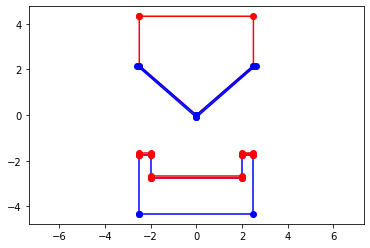

In [12]:
# Let's check the shape before trying to get GMSH to make a model ...
import matplotlib.pyplot as plt

x1 = [B1X, B2X, B3X, B4X, B5X, B6X, B7X, B8X, B1X]
y1 = [B1Y, B2Y, B3Y, B4Y, B5Y, B6Y, B7Y, B8Y, B1Y]

x2 = [P1X, P2X, x0, P3X, P4X, P1X]
y2 = [P1Y, P2Y, y0, P3Y, P4Y, P1Y]

x3 = [TC1X, TC2X, x0, P2X]
y3 = [TC1Y, TC2Y, y0, P2Y]

x4 = [TC2X, TC3X, P3X, x0]
y4 = [TC2Y, TC3Y, P3Y, y0]

x5 = [B4X, BCC1X, BCC2X, B5X, B4X]
y5 = [B4Y, BCC1Y, BCC2Y, B5Y, B4Y]

x6 = [B2X, BCL1X, BCL2X, B3X, B2X]
y6 = [B2Y, BCL1Y, BCL2Y, B3Y, B2Y]

x7 = [B6X, BCR1X, BCR2X, B7X, B6X]
y7 = [B6Y, BCL1Y, BCL2Y, B7Y, B6Y]
      
plt.plot(x1,y1, 'b-o')
plt.plot(x2,y2,'r-o')
plt.plot(x3, y3, 'b-o')
plt.plot(x4, y4, 'b-o')
plt.plot(x5, y5, 'r-o')
plt.plot(x6, y6, 'r-o')
plt.plot(x7, y7, 'r-o')

plt.axis("equal")

In [13]:
# Create the model.
gmsh.initialize()
gmsh.model.add("mesh")

# Define points: center of circle and two points on opposite sides.
p0 = gmsh.model.geo.addPoint(x0,y0, z0, delta)
p1 = gmsh.model.geo.addPoint(x0, y0-r0, z0, delta)
p2 = gmsh.model.geo.addPoint(x0, y0+r0,z0, delta)

#Define points: Top Magnet
T1 = gmsh.model.geo.addPoint(P1X, P1Y, z0, delta)
T2 = gmsh.model.geo.addPoint(P2X, P2Y, z0, delta)
T3 = gmsh.model.geo.addPoint(x0,y0, z0, delta)
T4 = gmsh.model.geo.addPoint(P3X, P3Y, z0, delta)
T5 = gmsh.model.geo.addPoint(P4X, P4Y, z0, delta)

#Define points: Bottom Magnet
B1 = gmsh.model.geo.addPoint(B1X, B1Y, z0, delta)
B2 = gmsh.model.geo.addPoint(B2X, B2Y, z0, delta)
B3 = gmsh.model.geo.addPoint(B3X, B3Y, z0, delta)
B4 = gmsh.model.geo.addPoint(B4X, B4Y, z0, delta)
B5 = gmsh.model.geo.addPoint(B5X, B5Y, z0, delta)
B6 = gmsh.model.geo.addPoint(B6X, B6Y, z0, delta)
B7 = gmsh.model.geo.addPoint(B7X, B7Y, z0, delta)
B8 = gmsh.model.geo.addPoint(B8X, B8Y, z0, delta)

#Define points: Top and bottom magnetic regions
TM1 = gmsh.model.geo.addPoint(TC1X, TC1Y, z0, delta) #Top magnets (3 points)
TM2 = gmsh.model.geo.addPoint(TC2X, TC2Y, z0, delta)
TM3 = gmsh.model.geo.addPoint(TC3X, TC3Y, z0, delta)
BMC1 = gmsh.model.geo.addPoint(BCC1X, BCC1Y, z0, delta) #Bottom Center (2 points)
BMC2 = gmsh.model.geo.addPoint(BCC2X, BCC2Y, z0, delta)
BML1 = gmsh.model.geo.addPoint(BCL1X, BCL1Y, z0, delta) #Bottom Left (2 points)
BML2 = gmsh.model.geo.addPoint(BCL2X, BCL2Y, z0, delta)
BMR1 = gmsh.model.geo.addPoint(BCR1X, BCR1Y, z0, delta) #Bottom Right (2 points)
BMR2 = gmsh.model.geo.addPoint(BCR2X, BCR2Y, z0, delta)

#Define: "charged" regions on magnet edges
#Top Magnet Loop
R1 = gmsh.model.geo.addLine(TM1, TM2)
R2 = gmsh.model.geo.addLine(TM2, TM3)
R3 = gmsh.model.geo.addLine(TM3, T4)
R4 = gmsh.model.geo.addLine(T4, T3)
R5 = gmsh.model.geo.addLine(T3, T2)
R6 = gmsh.model.geo.addLine(T2, TM1)
TopChargeLoop = gmsh.model.geo.addCurveLoop([R1, R2, R3, R4, R5, R6])
#Bottom Magnet Loop Center
BC1 = gmsh.model.geo.addLine(BMC1, BMC2)
BC2 = gmsh.model.geo.addLine(BMC2, B5)
BC3 = gmsh.model.geo.addLine(B5, B4)
BC4 = gmsh.model.geo.addLine(B4, BMC1)
BotCenterChargeLoop = gmsh.model.geo.addCurveLoop([BC1, BC2, BC3, BC4])
#Bottom Magnet Loop Left
BL1 = gmsh.model.geo.addLine(BML1, BML2)
BL2 = gmsh.model.geo.addLine(BML2, B3)
BL3 = gmsh.model.geo.addLine(B3, B2)
BL4 = gmsh.model.geo.addLine(B2, BML1)
BotLeftChargeLoop = gmsh.model.geo.addCurveLoop([BL1, BL2, BL3, BL4])
#Bottom Magnet Loop Right
BR1 = gmsh.model.geo.addLine(BMR1, BMR2)
BR2 = gmsh.model.geo.addLine(BMR2, B7)
BR3 = gmsh.model.geo.addLine(B7, B2)
BR4 = gmsh.model.geo.addLine(B2, BMR1)
BotRightChargeLoop = gmsh.model.geo.addCurveLoop([BR1, BR2, BR3, BR4])

# #Define: Top magnet shape
L1 = gmsh.model.geo.addLine(T1, T2)
L2 = gmsh.model.geo.addLine(T2, T3)
L3 = gmsh.model.geo.addLine(T3, T4)
L4 = gmsh.model.geo.addLine(T4, T5)
L5 = gmsh.model.geo.addLine(T5, T1)
topLoop = gmsh.model.geo.addCurveLoop([L1, L2, L3, L4, L5])
#Define: Top magnet shape
L_1 = gmsh.model.geo.addLine(T1, TM1)
L_2 = gmsh.model.geo.addLine(TM1, TM2)
L_3 = gmsh.model.geo.addLine(TM2, TM3)
L_4 = gmsh.model.geo.addLine(TM3, T5)
L_5 = gmsh.model.geo.addLine(T5, T1)
topLoopExtended = gmsh.model.geo.addCurveLoop([L_1, L_2, L_3, L_4,L_5])

#Define: Bottom magnet shape
D1 = gmsh.model.geo.addLine(B1, B2)
D2 = gmsh.model.geo.addLine(B2, B3)
D3 = gmsh.model.geo.addLine(B3, B4)
D4 = gmsh.model.geo.addLine(B4, B5)
D5 = gmsh.model.geo.addLine(B5, B6)
D6 = gmsh.model.geo.addLine(B6, B7)
D7 = gmsh.model.geo.addLine(B7, B8)
D8 = gmsh.model.geo.addLine(B8, B1)
bottomLoop = gmsh.model.geo.addCurveLoop([D1, D2, D3, D4, D5, D6, D7, D8])
#Add hole loop to speed up processing
D_1 = gmsh.model.geo.addLine(B1, BML1)
D_2 = gmsh.model.geo.addLine(BML1, BML2)
D_3 = gmsh.model.geo.addLine(BML2, BMC1)
D_4 = gmsh.model.geo.addLine(BMC1, BMC2)
D_5 = gmsh.model.geo.addLine(BMC2, BMR1)
D_6 = gmsh.model.geo.addLine(BMR1, BMR2)
D_7 = gmsh.model.geo.addLine(BMR2, B8)
D_8 = gmsh.model.geo.addLine(B8, B1)
botLoopExtended = gmsh.model.geo.addCurveLoop([D_1, D_2, D_3, D_4, D_5, D_6, D_7, D_8])


In [14]:
# Define two semicircular arcs that will be joined into a circle.
# The circular disk is the "universe" --- the entire region of interest.
c0 = gmsh.model.geo.addCircleArc(p1, p0, p2)
c1 = gmsh.model.geo.addCircleArc(p2, p0, p1)
universe = gmsh.model.geo.addCurveLoop([c0,c1])

# The "background" is the universe, minus holes for the objects inside.
background = gmsh.model.geo.addPlaneSurface([universe,topLoopExtended,botLoopExtended])

# The two objects fill in the holes in the background.
topMagnet = gmsh.model.geo.addPlaneSurface([topLoop])
bottomMagnet = gmsh.model.geo.addPlaneSurface([bottomLoop])
topCharge = gmsh.model.geo.addPlaneSurface([TopChargeLoop])
# botCentCharge = gmsh.model.geo.addPlaneSurface([BotCenterChargeLoop])
# botLeftCharge = gmsh.model.geo.addPlaneSurface([BotLeftChargeLoop])
# botRightCharge = gmsh.model.geo.addPlaneSurface([BotRightChargeLoop])

# Update the model with all of the features we add.
gmsh.model.geo.synchronize()

# Identify the physical objects: boundaries and surfaces.
gmsh.model.addPhysicalGroup(1, [c0,c1], 1)
#gmsh.model.addPhysicalGroup(2, [background], 1)
gmsh.model.addPhysicalGroup(1, [L1, L2, L3, L4,L5], 2)
gmsh.model.addPhysicalGroup(2, [topMagnet], 2)
gmsh.model.addPhysicalGroup(1, [D1, D2, D3, D4, D5, D6, D7, D8], 3)
gmsh.model.addPhysicalGroup(2, [bottomMagnet], 3)
# gmsh.model.addPhysicalGroup(1, [R1, R2, R3, R4, R5, R6], 4)
# gmsh.model.addPhysicalGroup(2, [topCharge], 4)
# gmsh.model.addPhysicalGroup(1, [BC1, BC2, BC3, BC4], 5)
# gmsh.model.addPhysicalGroup(2, [botCentCharge], 5)
# gmsh.model.addPhysicalGroup(1, [BL1, BL2, BL3, BL4], 6)
# gmsh.model.addPhysicalGroup(2, [botLeftCharge], 6)
# gmsh.model.addPhysicalGroup(1, [BR1, BR2, BR3, BR4], 7)
# gmsh.model.addPhysicalGroup(2, [botRightCharge], 7)

3

In [ ]:
# Create a mesh for this system.
gmsh.model.mesh.generate(dim)

# Bring the mesh into FEniCSx.
mesh, subdomains, boundaries = dolfinx.io.gmshio.model_to_mesh(
    gmsh.model, comm=mpi4py.MPI.COMM_WORLD, rank=0, gdim=2)

# Close the mesh generating program.
gmsh.finalize()

In [ ]:
# Plot the entire mesh.
multiphenicsx.io.plot_mesh(mesh)

In [ ]:
# Plot the subdomains that FEniCSx has identified.
# There should only be one for this model.
multiphenicsx.io.plot_mesh_tags(subdomains)

In [ ]:
# Inspect the boundaries of the elements and the system.
multiphenicsx.io.plot_mesh_tags(boundaries)

So I couldn't figure out how to set the magnetization vector for the magnets, so I'm just going to solve for the field and when we add that in I can replace whatever placeholders I use with the actual magnetization vector. 

In [1]:
# This loop will assign material properties to each cell in our model.
# In this case, it is the relative magnetic permeability and current density.

# Define a simple function space for properties.
Q = dolfinx.fem.FunctionSpace(mesh, ("DG", 0))

# Get the list of materials.
material_tags = np.unique(subdomains.values)

# Define functions for current magnetic permeability.
mu = dolfinx.fem.Function(Q)

# Now, cycle over all objects and assign material properties. 
for tag in material_tags:
    cells = subdomains.find(tag)
    
    # Set values for magnetic permiability & "magnetic charge" density
    if tag == 1:
        mu_ = mu_background
    elif tag == 4:
        Q_M = Q_Top #Top Magnet region charge
    elif tag == 5 or tag == 6 or tag == 7:
        Q_M = Q_Bot #Bottom magnet region(s) charge
    else:
        mu_ = mu_magnet #magnetic material permiability

mu.x.array[cells] = np.full_like(cells, mu_, dtype=petsc4py.PETSc.ScalarType)
## Set up the finite element problem.

# Define trial and test functions.
V = dolfinx.fem.FunctionSpace(mesh, ("Lagrange", 2))

# Define the trial and test functions.
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

# Create a function to store the solution.
# This is the vector potential.  A_x = A_y = 0.
A_z = dolfinx.fem.Function(V)

# Identify the domain and boundary.
D = mesh.topology.dim
Omega = dolfinx.mesh.locate_entities_boundary(mesh, D-1, lambda x: np.full(x.shape[1], True))
dOmega = dolfinx.fem.locate_dofs_topological(V, D-1, Omega)

# Force the potential to vanish on the boundary.
bc = dolfinx.fem.dirichletbc(petsc4py.PETSc.ScalarType(0), dOmega, V)

# Define the Poisson equation we are trying to solve.
# a = ufl.inner(ufl.grad(u), ufl.grad(v)) * ufl.dx
# L = 4 * ufl.pi * v * ufl.dx
a = ufl.dot(ufl.grad(u), ufl.grad(v)) * ufl.dx
L = ufl.Constant('0') * v * ufl.dx

# Define the problem.
problem = dolfinx.fem.petsc.LinearProblem(a, L, u=A_z, bcs=[bc])

# Solve the problem.
problem.solve()

electric_field = ufl.project(-ufl.grad(u))

# Compute the magnetic field.
W = dolfinx.fem.VectorFunctionSpace(mesh, ("CG", 2))
B = dolfinx.fem.Function(W)
B_expr = dolfinx.fem.Expression(ufl.as_vector((A_z.dx(1), -A_z.dx(0))), W.element.interpolation_points())
B.interpolate(B_expr)

NameError: ignored